In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import bokeh 
import re
import spacy
def eda_helper(df):
    dict_list = []
    for col in df.columns:
        data = df[col]
        dict_ = {}
        # The null count for a column. Columns with no nulls are generally more interesting
        dict_.update({"null_count" : data.isnull().sum()})
        # Counting the unique values in a column
        # This is useful for seeing how interesting the column might be as a feature
        dict_.update({"unique_count" : len(data.unique())})
        # Finding the types of data in the column
        # This is useful for finding out potential problems with a column having strings and ints
        dict_.update({"data_type" : set([type(d).__name__ for d in data])})
        #dict_.update({"score" : match[1]})
        dict_list.append(dict_)
    eda_df = pd.DataFrame(dict_list)
    eda_df.index = df.columns
        
    return eda_df
import matplotlib.pyplot as plt
import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt


In [4]:
depression=pd.read_csv("/Users/yonilevine/Desktop/Capstone/datasets/depression_17000_clean.csv")

In [5]:
suicide=pd.read_csv("/Users/yonilevine/Desktop/Capstone/datasets/suicide_full.csv")

In [6]:
depression.head()

,username,text,posts,swedishfish
0,Juno2,I've kept my depression and OCD hidden from my...,7.00,0.00
1,TimeTourist,I've had clinical depression for a little over...,36.00,23.00
2,InSearchOfPeople,Yesterday I quit my job of 5 years. This job g...,268.00,92.00
3,InSearchOfPeople,I got a new roommate. A guy who found me on FB...,268.00,92.00
4,Lilyfrog,Ok. Had a really bad weekend this weekend gone...,164.00,271.00


In [7]:
suicide.head()

,Unnamed: 0,username,text,posts,swedishfish
0,0,nocturne,"I used ""chat"" rather. Told the ""counselor"" my ...",70.0,11.00
1,1,gpp98933,"hi, I'm 15 years old, and since i'm 12 i've be...",3.0,0.00
2,2,Gxdhatesme,"Words are not enough to describe the anger, th...",4.0,0.00
3,3,Piece of crap,deleted,1.0,0.00
4,4,FalseSmile,Before anyone reads this please understand i a...,1.0,0.00


In [8]:
suicide.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
depression.isnull().sum()

username         0
text            10
posts          186
swedishfish     34
dtype: int64

In [10]:
suicide.isnull().sum()

username         0
text             2
posts           63
swedishfish    243
dtype: int64

In [11]:
depression['username']=[name.replace(' ','_').lower() for name in depression.username]

In [12]:
suicide['username']=[name.replace(' ','_').lower() for name in suicide.username]

In [13]:
depression.rename(columns={'posts':'siteposts'},inplace=True)
suicide.rename(columns={'posts':'siteposts'},inplace=True)

In [14]:
suicide.dtypes

username        object
text            object
siteposts      float64
swedishfish     object
dtype: object

In [15]:
depression=depression.dropna(how='any',subset=['text'])
suicide=suicide.dropna(how='any',subset=['text'])

In [16]:
depression.isnull().sum()

username         0
text             0
siteposts      186
swedishfish     34
dtype: int64

In [17]:
depression.drop_duplicates(inplace=True)
suicide.drop_duplicates(inplace=True)

In [18]:
dnames=depression.username.unique()
snames=suicide.username.unique()

In [19]:
overlaps=[]
for item in dnames:
    if item in snames:
        overlaps.append(item)


In [20]:
print len(dnames)
print len(snames)
print len(overlaps)

6812
3303
1093


In [21]:
overlapdummy=[]
for item in depression.username:
    if item in snames:
        overlapdummy.append(1)
    else:
        overlapdummy.append(0)

In [22]:
len(overlapdummy)

17397

In [23]:
len(depression)

17397

In [24]:
depression['insuicide']=overlapdummy

In [25]:
depression.head(10)

,username,text,siteposts,swedishfish,insuicide
0,juno2,I've kept my depression and OCD hidden from my...,7.00,0.00,0
1,timetourist,I've had clinical depression for a little over...,36.00,23.00,0
2,insearchofpeople,Yesterday I quit my job of 5 years. This job g...,268.00,92.00,1
3,insearchofpeople,I got a new roommate. A guy who found me on FB...,268.00,92.00,1
4,lilyfrog,Ok. Had a really bad weekend this weekend gone...,164.00,271.00,1
5,callherblackmariah,Everyday I see people going about their lives....,1.00,0.00,0
6,sensualgirl,"All the suffering I went through, and now I'm ...",5349.00,681.00,0
7,lavendernothing,I'm a 23 year olds and I've been drawing since...,2.00,0.00,1
8,insearchofpeople,So I wasn't sure about my new roommate. We see...,268.00,92.00,1
9,always_lonely,"Hi, I am a good and giving person normally and...",2.00,0.00,0


In [26]:
overlapdummys=[]
for item in suicide.username:
    if item in dnames:
        overlapdummys.append(1)
    else:
        overlapdummys.append(0)

In [27]:
len(overlapdummys)

6920

In [28]:
len(suicide)

6920

In [29]:
suicide['indepression']=overlapdummys

In [30]:
m1=suicide.username=='silent_cry'
m2=suicide.username=='brandysnap'
m3=suicide.username=='unhappy19uk'
m4=suicide.username=='tears_of_stone'
m5=suicide.username=='dreamer'
m6=suicide.username=='strawbean'
m7=suicide.username=='gracekeeper'
m8=suicide.username=='shuddering_desolation'
m9=suicide.username=='unhappy19uk'
m10=suicide.username=='funnybone'
m11=suicide.username=='girllost'
m12=suicide.username=='kajay15'
suicide.loc[m1,'siteposts']=22768
suicide.loc[m2,'siteposts']=22164
suicide.loc[m3,'swedishfish']=34
suicide.loc[m3,'siteposts']=820
suicide.loc[m4,'siteposts']=1356
suicide.loc[m4,'swedishfish']=389
suicide.loc[m5,'siteposts']=4075
suicide.loc[m6,'siteposts']=11029
suicide.loc[m7,'siteposts']=271
suicide.loc[m8,'siteposts']=49
suicide.loc[m9,'siteposts']=820
suicide.loc[m10,'siteposts']=141
suicide.loc[m11,'siteposts']=148
suicide.loc[m12,'siteposts']=14
suicide.loc[m5,'swedishfish']=0
suicide.loc[m6,'swedishfish']=478
suicide.loc[m7,'swedishfish']=0
suicide.loc[m8,'swedishfish']=0
suicide.loc[m9,'swedishfish']=34
suicide.loc[m10,'swedishfish']=1
suicide.loc[m11,'swedishfish']=11
suicide.loc[m12,'swedishfish']=0
m13=suicide.username=='crimson'
suicide.loc[m13,'swedishfish']=58
m14=suicide.username=='blackrosesxbleedinghearts'
suicide.loc[m14,'swedishfish']=609
m15=suicide.username=='venom'
suicide.loc[m15,'swedishfish']=1515
m16=suicide.username=='rastronomy'
suicide.loc[m16,'swedishfish']=30
m17=suicide.username=='hiddenstorms'
suicide.loc[m17,'swedishfish']=604
m18=suicide.username=='versae'
suicide.loc[m18,'swedishfish']=2059
m19=suicide.username=='kiss_of_darkness'
suicide.loc[m19,'swedishfish']=0
m20=suicide.username=='albinorat'
suicide.loc[m20,'swedishfish']=200
m21=suicide.swedishfish.isnull()
suicide.loc[m21,'swedishfish']=15

In [31]:
depression2=pd.DataFrame(depression)

In [32]:
depression2.isnull().sum()

username         0
text             0
siteposts      186
swedishfish     34
insuicide        0
dtype: int64

In [33]:
depression2.dropna(how='any',inplace=True)

In [34]:
suicide2=pd.DataFrame(suicide)

In [35]:
suicide2.dtypes

username         object
text             object
siteposts       float64
swedishfish      object
indepression      int64
dtype: object

In [36]:
depression2.shape

(17177, 5)

In [37]:
suicide2.shape

(6920, 5)

In [38]:
depression2['swedishfish'] = pd.to_numeric(depression2.swedishfish, errors='coerce')
depression2['siteposts'] = pd.to_numeric(depression2.siteposts, errors='coerce')
suicide2['siteposts'] = pd.to_numeric(suicide2.siteposts, errors='coerce')
suicide2['swedishfish'] = pd.to_numeric(suicide2.swedishfish, errors='coerce')
# suicide['swedishfish'] = suicide['swedishfish'].astype(float)
# depression['siteposts'] = depression['siteposts'].astype(float)
# suicide['siteposts'] = suicide['siteposts'].astype(float)

In [39]:
# depression['swedishfish']=depression['swedishfish'].strip('')
# depression['siteposts']=depression['siteposts'].replace(',')
# suicide['swedishfish']=suicide['swedishfish'].replace(',')
# suicide['siteposts']=suicide['siteposts'].replace(',')

In [40]:
suicide2.isnull().sum()

username        0
text            0
siteposts       0
swedishfish     1
indepression    0
dtype: int64

In [41]:
depression2.isnull().sum()

username         0
text             0
siteposts      211
swedishfish      8
insuicide        0
dtype: int64

In [42]:
depression2.dropna(how='any',inplace=True)

In [43]:
suicide2.dropna(how='any',inplace=True)

In [44]:
smerged=suicide2.groupby('username').agg({'text':'sum','swedishfish':'max','siteposts':'max','indepression':'max'})

In [45]:
dmerged=depression2.groupby('username').agg({'text':'sum','swedishfish':'max','siteposts':'max','insuicide':'max'})

In [60]:
smerged[smerged['siteposts']<5000].describe()

,swedishfish,indepression,siteposts
count,3276.000000,3276.000000,3276.000000
mean,27.463675,0.326007,99.235043
std,303.927407,0.468822,379.929910
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,2.000000
50%,0.000000,0.000000,6.000000
75%,0.000000,1.000000,30.000000
max,13337.000000,1.000000,4897.000000


In [61]:
dmerged[dmerged['siteposts']<5000].describe()

,swedishfish,insuicide,siteposts
count,6688.000000,6688.000000,6688.000000
mean,18.282895,0.156848,61.983852
std,252.888320,0.363685,292.396126
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000
50%,0.000000,0.000000,4.000000
75%,0.000000,0.000000,17.000000
max,13337.000000,1.000000,4897.000000


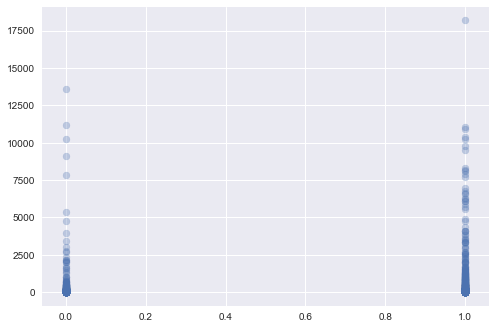

In [58]:
x=dmerged.insuicide
y=dmerged.siteposts
plt.scatter(x,y,alpha=.3)
plt.xkcd
plt.show()

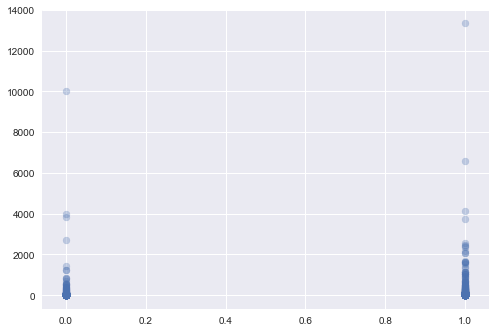

In [52]:
x=dmerged.insuicide
y=dmerged.swedishfish
plt.scatter(x,y,alpha=.3)
plt.show()

In [50]:
depression.to_csv("/Users/yonilevine/Desktop/Capstone/datasets/depressionnlp.csv")

In [ ]:
def triangle_prob(n):
    count=0
    for i in range(n):
        b1=np.random.uniform(0,1)
        b2=np.random.uniform(0,1)
        if max(1-max(b1,b2),
               min(b1,b2),
               abs(b1-b2))<.5:
            count+=1
    return count/float(n)    


In [ ]:
triangle_prob(1000000)